# Life expectancy and GDP
In this project, data from the World Health Organization and the World Bank is used to analyze the relationship between GDP and life expectancy for various countries

### Preparation
Import the dataset, perform a preview of the daata in the columns and prepare the variables to be used in the analysis

In [139]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [140]:
lexp = pd.read_csv('all_data.csv')
print(lexp.head())
#4 coulmns that contain years of life expectancy and GDP across countries and years

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [141]:
lexp.info()
#The dataset seems very clean, with no null values and the data types for the columns corresponding to the
#information they contain

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [142]:
print(lexp.Country.value_counts())
#There are 96 data points, corresponding to 6 countries and every country has the same number of data points

Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64


In [143]:
print(lexp.Year.value_counts())
#We have information from 2000 to 2015 evenly distributed among every year

2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
Name: Year, dtype: int64


In [144]:
print(lexp['Life expectancy at birth (years)'].describe())

count    96.000000
mean     72.789583
std      10.672882
min      44.300000
25%      74.475000
50%      76.750000
75%      78.900000
max      81.000000
Name: Life expectancy at birth (years), dtype: float64


In [145]:
# The GDP reported is in USD, I will transform it into Billions USD to make the numbers more manageable
#and to reduce the spread in future plots(hopefully)
lexp['GDP Billions'] = lexp.GDP / 1000000000
print(lexp['GDP Billions'].describe())

count       96.000000
mean      3880.498571
std       5197.561311
min          4.415703
25%        173.301750
50%       1280.220000
75%       4067.510000
max      18100.000000
Name: GDP Billions, dtype: float64


In [146]:
#There is still a huge range of values of GDP, therefore I think using a log scale is better if I want to visualize
# all the data points at the same time
lexp['log_GDP'] = np.log(lexp['GDP'])
print(lexp['log_GDP'].describe())

count    96.000000
mean     27.352684
std       2.504063
min      22.208433
25%      25.878295
50%      27.877952
75%      29.031362
max      30.526933
Name: log_GDP, dtype: float64


### Analysis
These are the questions I want to address in the analysis:
- How has life expectancy changed over the years in the countries present in the dataset?
- Is there a correlation between GDP and Life Expectancy?
- How has GDP changed over time, across countries?

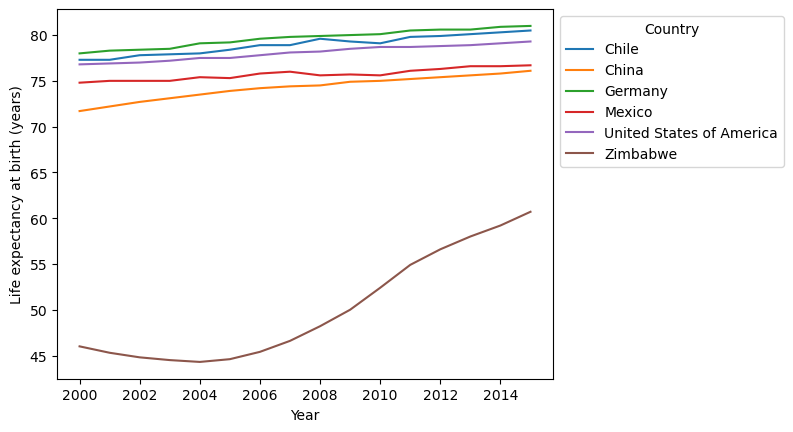

In [147]:
#How has life expectancy changed over the years in the countries present in the dataset?
ax = sns.lineplot(x=lexp['Year'], y='Life expectancy at birth (years)', data=lexp, hue='Country')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#### How has life expectancy changed over the years in the countries present in the dataset?

1. The life expectancy has steadily incresed
2. Zimbabwe has seen the most rising in the life expectancy, in percentage and in nominal value
3. The ranking for life expectancy hasn't changed, the order of the countries is Germany, Chile, usa, mexico, china, zimbabwe

The plot shows that life expectancy has risen steadily for most countries in this dataset.
The clear exception is Zimbabwe, where life expectancy has skyrocketed by 14 years!
Although this is an improvement of 32%, the life expectancy for Zimbabwe is less than the average of the other countries. In 2015, Zimbabwe had a life expectancy of 60 years and the average for all the other countries was 78.72 years

Another takeaway from this plot is that the relative position of the countries has mantained: Germany is the country with the highest life expectancy, and Zimbabwe is the country with the lowest.

In [148]:
#Change in life expectancy for Zimbabwe
change_life_expectancy_zim = lexp[ (lexp['Country'] == 'Zimbabwe') & ((lexp['Year'] == 2015) | (lexp['Year'] == 2000))][['Country','Year','Life expectancy at birth (years)']]
print(change_life_expectancy_zim)
#In percentage points
percentage = (60.7-46)/46
print(f'Percent change: {percentage:.2%}')

     Country  Year  Life expectancy at birth (years)
80  Zimbabwe  2000                              46.0
95  Zimbabwe  2015                              60.7
Percent change: 31.96%


In [149]:
#Mean life expectancy for countries other than Zimbabwe in 2015
lexp[ (lexp['Year'] == 2015) & (lexp['Country'] != 'Zimbabwe') ]['Life expectancy at birth (years)'].mean()

78.72

<hr>

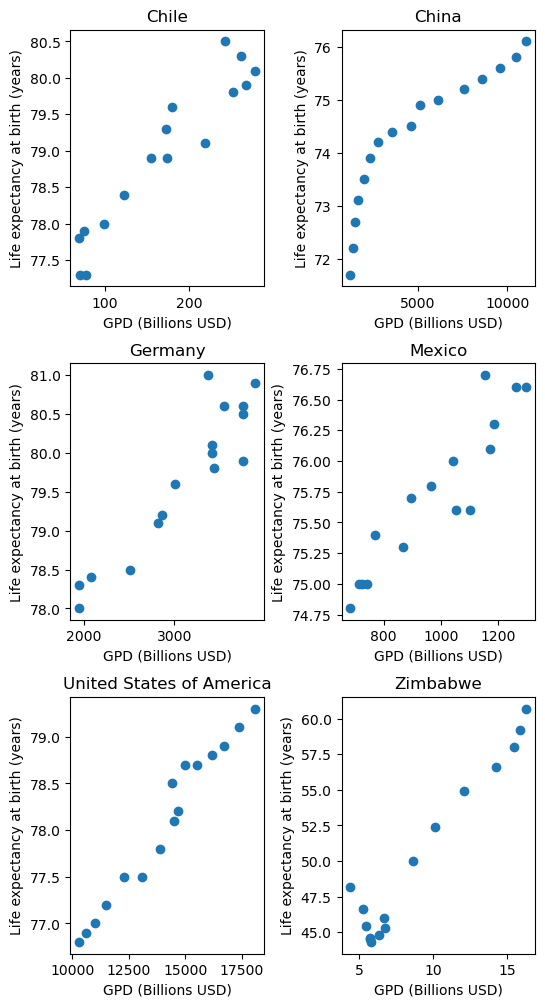

<Figure size 640x480 with 0 Axes>

In [159]:
#Is there a relationship between GDP and life expectancy?
fig = plt.figure(figsize=(6,12))
plt.subplots_adjust(
    wspace=.4,
    hspace=.3
)
for idx, country in enumerate(lexp['Country'].unique()):
    ax = plt.subplot(3,2,idx+1)
    temp = lexp[ lexp['Country'] == country ]
    plt.scatter(x='GDP Billions', y='Life expectancy at birth (years)', data=temp)
    plt.title(country)
    plt.xlabel('GPD (Billions USD)')
    plt.ylabel('Life expectancy at birth (years)')
    
plt.show()
plt.clf()

#### Is there a relationship between GDP and life expectancy?
Clearly, for every country there is a strong relationship between GDP and life expectancy. If one raises, the other does as well. For most countries, the relationship is approximately linear, for China it followed a urve, raising rapidly, stabilizing and then raising raapidly again

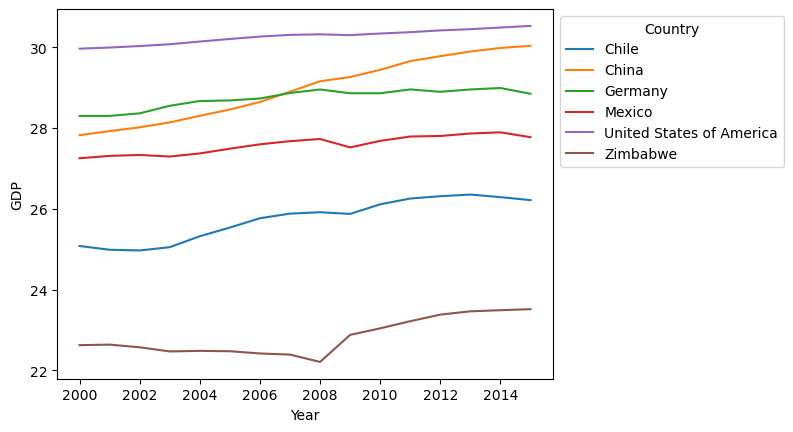

In [151]:
ax = sns.lineplot(x=lexp['Year'], y='log_GDP', data=lexp, hue='Country')
plt.ylabel('GDP')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

#### How has GDP changed over time, across countries?
GDP also raised steadily for all countries in the dataset, and we also have an exception in this plot. China raised its GDP rapidly to surpass that of Germany, making China the 2nd highest GDP of these countries.
Note that the countries with the highest GDP do not match with the countries with the highest life expectancy.
For example, China ended with the 2nd highest GDP but the 5th highest life expectancy.
On the other end, Chile had the 5th highest GDP but the 2nd highest life expectancy.

### Conclusion
The data clearly shows a correlation between GDP and life expectancy. For every country, the life expectancy raised with its GDP.
Across countries, the GDP is not a good indicator of a higher life expectancy. Richer countries do not always have higher life expectancies than poorer countries. Perhaps this is because there are more factors that affect life expectancies, and it is an interesting exercise for the reader to investigate those other variables to complement their understanding of the analysis done here.

### Other interesting plots

<AxesSubplot:xlabel='Year', ylabel='GDP Billions'>

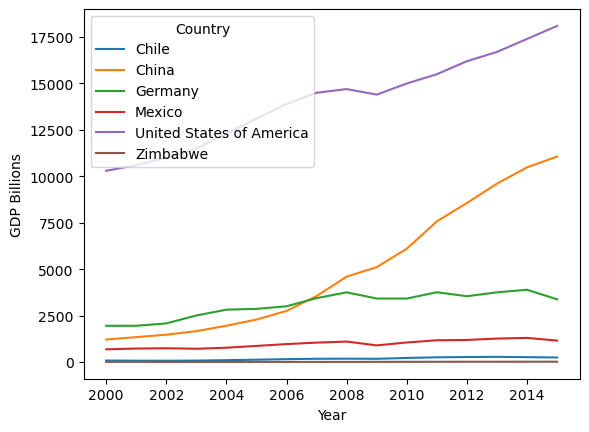

In [158]:
#GDP change over the years. GDP in billions, shows the huge difference between the lowest-GDP and the highest-GDP countries
sns.lineplot(x=lexp['Year'], y='GDP Billions', data=lexp, hue='Country')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'United States of America'),
  Text(1, 0, 'China'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'Mexico'),
  Text(4, 0, 'Chile'),
  Text(5, 0, 'Zimbabwe')])

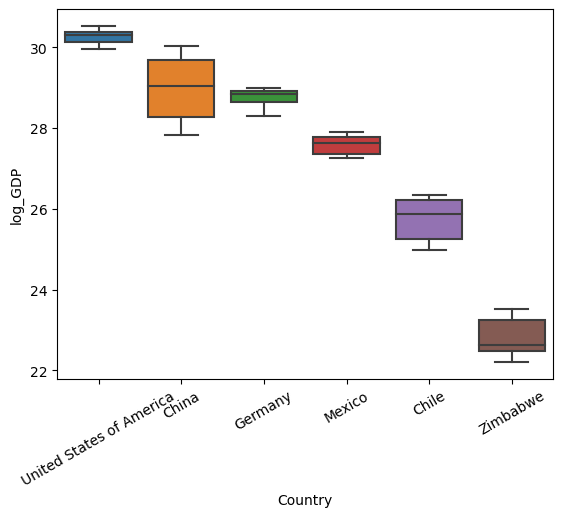

In [153]:
#Shows summary statistics for the GDP (logarithmic scale)
ax = sns.boxplot(
    x='Country',
    y='log_GDP',
    data=lexp, 
    order=lexp.groupby('Country')['log_GDP'].mean().sort_values(ascending=False).index
)
plt.xticks(rotation=30)

Text(0.5, 1.0, 'Chile has a higher life expectancy than the USA')

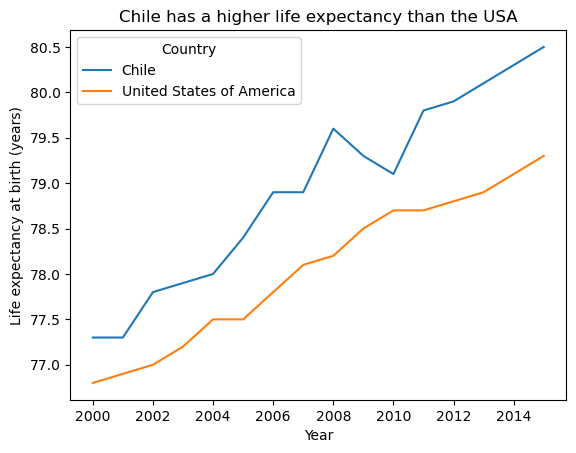

In [154]:
#Chile has a higher life expectancy than the USA in every year of the sample
chile_vs_eu = lexp[ lexp['Country'].isin(('United States of America', 'Chile')) ]
sns.lineplot(data=chile_vs_eu, x='Year', y='Life expectancy at birth (years)', hue='Country')
plt.title('Chile has a higher life expectancy than the USA')

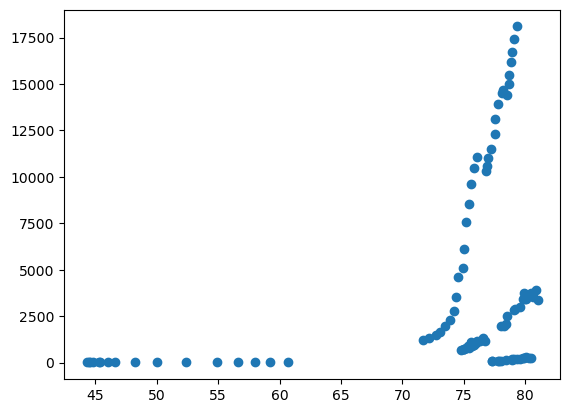

<Figure size 640x480 with 0 Axes>

In [155]:
#Reverse relationship: GDP as a function of life expectancy
plt.scatter(x='Life expectancy at birth (years)', y='GDP Billions', data=lexp)
plt.show()
plt.clf()

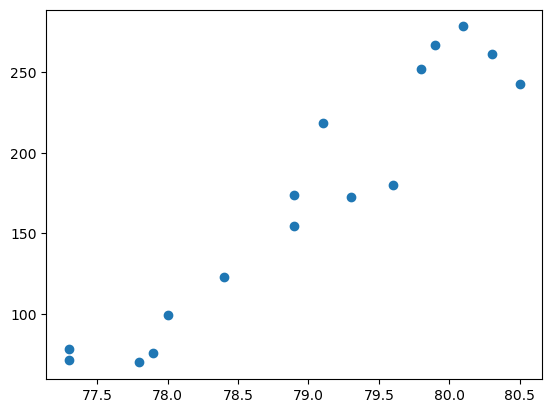

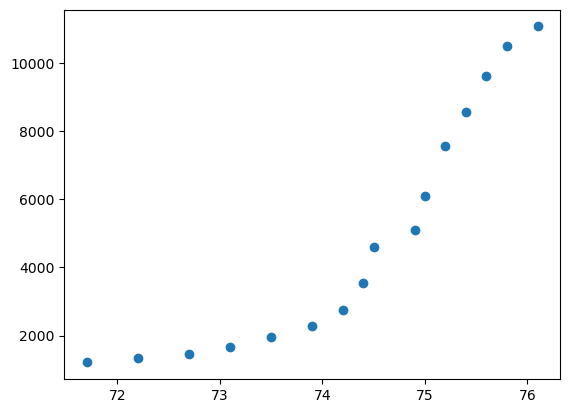

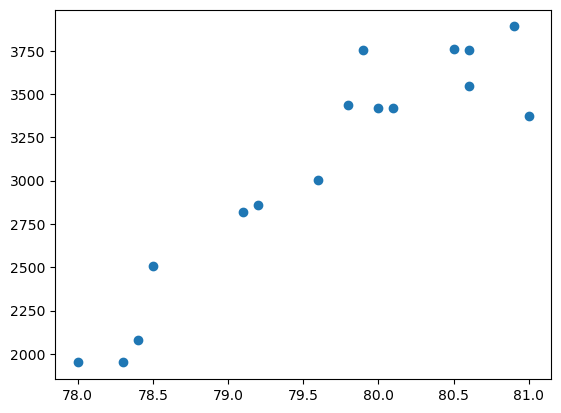

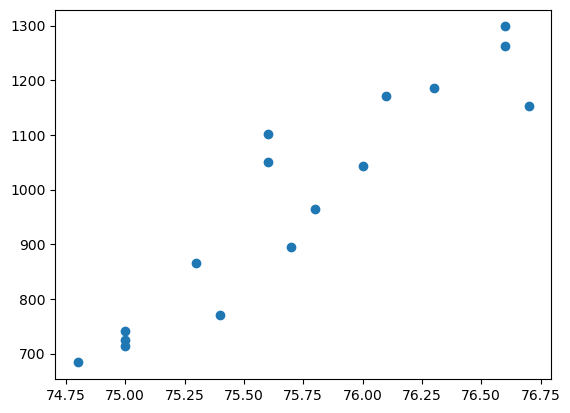

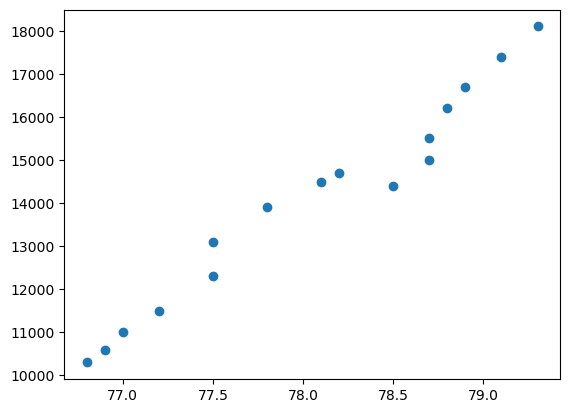

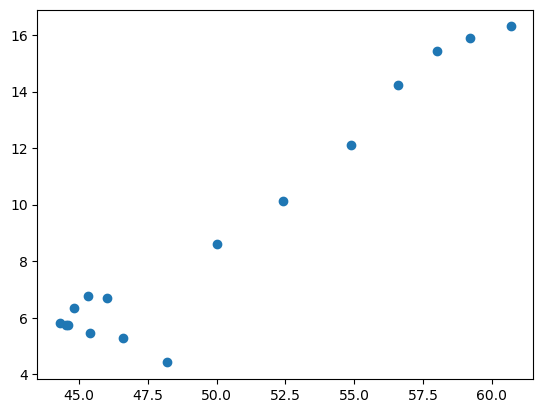

<Figure size 640x480 with 0 Axes>

In [156]:
#Reverse relationship: GDP as a function of life expectancy, data per country
for country in lexp['Country'].unique():
    
    data = lexp[ lexp['Country'] == country ]
#     print(data)
    plt.scatter(x='Life expectancy at birth (years)', y='GDP Billions', data=data)
    plt.show()
    plt.clf()

(array([52., 16.,  6.,  1.,  2.,  4.,  4.,  3.,  5.,  3.]),
 array([4.41570280e+00, 1.81397413e+03, 3.62353256e+03, 5.43309099e+03,
        7.24264942e+03, 9.05220785e+03, 1.08617663e+04, 1.26713247e+04,
        1.44808831e+04, 1.62904416e+04, 1.81000000e+04]),
 <BarContainer object of 10 artists>)

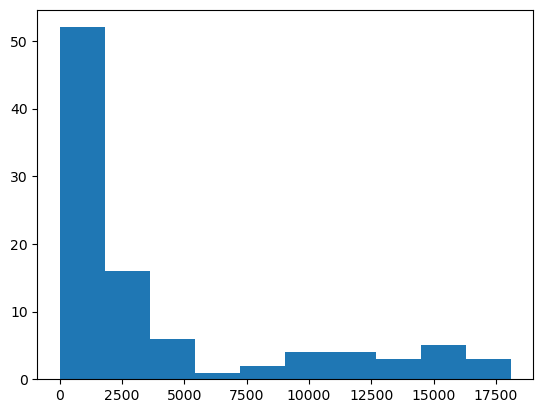

In [160]:
#Distribution of GDP. Skewed to the right
plt.hist(lexp['GDP Billions'])